# Tugas 3 Data Mining -  EDA + Klasifikasi
---
List Anggota Kelompok 9
*   Cahaya Aulia Firdausyah (2006304)
*   Anderfa Jalu Kawani (2102671)
*   Sabila Rosad (2106000)


## Pendahuluan

Analisis Data Eksplorasi (EDA) dan klasifikasi memainkan peran penting dalam memahami pola historis dan membuat prediksi akurat. Pada kompetisi DMC tahun ini, task pertama berfokus pada analisis data sesi historis toko untuk memprediksi kemungkinan terjadinya pesanan (order). Data historis mencakup sekitar 50.000 sesi dengan atribut target "order" yang memiliki dua nilai: "y" untuk pesanan yang dilakukan dan "n" untuk tidak ada pesanan.

Melalui EDA, analisis awal terhadap data dilakukan untuk mengidentifikasi distribusi, pola, dan hubungan antar fitur yang berkontribusi pada kemungkinan pesanan. Informasi ini membantu membangun model prediktif berbasis machine learning untuk menentukan probabilitas [0,1] bagi setiap sesi baru. Evaluasi model dilakukan berdasarkan tingkat kesalahan terhadap hasil aktual dari sekitar 5.000 sesi yang disediakan. Dengan pendekatan ini, diharapkan solusi yang akurat dapat dihasilkan untuk mengoptimalkan prediksi pesanan di masa depan.

## Import Library

Import library yang akan digunakan

In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive



##Load Dataset

In [ ]:
# Mount Google Drive to Colab
drive.mount('/content/drive')

# Read the transact_train.txt file from Google Drive into a DataFrame
df = pd.read_csv("/content/drive/MyDrive/Data Mining/Tugas 3/transact_train.txt", delimiter="|")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Display the first 5 rows of the DataFrame to preview the data
df.head()

,sessionNo,startHour,startWeekday,duration,cCount,cMinPrice,cMaxPrice,cSumPrice,bCount,bMinPrice,...,availability,customerNo,maxVal,customerScore,accountLifetime,payments,age,address,lastOrder,order
0,1,6,5,0.000,1,59.99,59.99,59.99,1,59.99,...,?,1,600,70,21,1,43,1,49,y
1,1,6,5,11.940,1,59.99,59.99,59.99,1,59.99,...,completely orderable,1,600,70,21,1,43,1,49,y
2,1,6,5,39.887,1,59.99,59.99,59.99,1,59.99,...,completely orderable,1,600,70,21,1,43,1,49,y
3,2,6,5,0.000,0,?,?,?,0,?,...,completely orderable,?,?,?,?,?,?,?,?,y
4,2,6,5,15.633,0,?,?,?,0,?,...,completely orderable,?,?,?,?,?,?,?,?,y


In [ ]:
# Show a summary of the DataFrame, including column data types, non-null counts, and memory usage
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429013 entries, 0 to 429012
Data columns (total 24 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   sessionNo        429013 non-null  int64  
 1   startHour        429013 non-null  int64  
 2   startWeekday     429013 non-null  int64  
 3   duration         429013 non-null  float64
 4   cCount           429013 non-null  int64  
 5   cMinPrice        429013 non-null  object 
 6   cMaxPrice        429013 non-null  object 
 7   cSumPrice        429013 non-null  object 
 8   bCount           429013 non-null  int64  
 9   bMinPrice        429013 non-null  object 
 10  bMaxPrice        429013 non-null  object 
 11  bSumPrice        429013 non-null  object 
 12  bStep            429013 non-null  object 
 13  onlineStatus     429013 non-null  object 
 14  availability     429013 non-null  object 
 15  customerNo       429013 non-null  object 
 16  maxVal           429013 non-null  obje

In [ ]:
# Generate summary statistics (mean, median, standard deviation, etc.) for numerical columns
df.describe()

,sessionNo,startHour,startWeekday,duration,cCount,bCount
count,429013.000000,429013.000000,429013.000000,429013.000000,429013.000000,429013.000000
mean,25274.631293,14.617061,5.924839,1573.901640,24.140317,4.135168
std,14441.366146,4.485914,0.790930,2427.123356,30.398164,4.451778
min,1.000000,0.000000,5.000000,0.000000,0.000000,0.000000
25%,12731.000000,11.000000,5.000000,225.070000,5.000000,1.000000
50%,25470.000000,15.000000,6.000000,738.199000,13.000000,3.000000
75%,37542.000000,18.000000,7.000000,1880.265000,31.000000,5.000000
max,50000.000000,23.000000,7.000000,21580.092000,200.000000,108.000000


In [ ]:
# Identify columns containing "?"
columns_with_question_mark = [col for col in df.columns if df[col].astype(str).str.contains('\?').any()]

print("Columns containing '?':", columns_with_question_mark)

Columns containing '?': ['cMinPrice', 'cMaxPrice', 'cSumPrice', 'bMinPrice', 'bMaxPrice', 'bSumPrice', 'bStep', 'onlineStatus', 'availability', 'customerNo', 'maxVal', 'customerScore', 'accountLifetime', 'payments', 'age', 'address', 'lastOrder']


In [ ]:
# Convert numeric columns to float, handling '?' values
numeric_cols = ['sessionNo', 'startHour', 'startWeekday', 'duration', 'cCount', 'bCount', 'maxVal', 'customerScore', 'accountLifetime', 'payments', 'age', 'lastOrder']
for col in numeric_cols:
    # Replace '?' with NaN before converting to float
    df[col] = df[col].replace('?', np.nan).astype(float)

# Convert categorical columns to string
categorical_cols = ['cMinPrice', 'cMaxPrice', 'cSumPrice', 'bMinPrice', 'bMaxPrice', 'bSumPrice', 'bStep', 'onlineStatus', 'availability', 'order', 'customerNo', 'address']
df[categorical_cols] = df[categorical_cols].astype(str)

# Verify the data types
print(df.dtypes)

sessionNo          float64
startHour          float64
startWeekday       float64
duration           float64
cCount             float64
cMinPrice           object
cMaxPrice           object
cSumPrice           object
bCount             float64
bMinPrice           object
bMaxPrice           object
bSumPrice           object
bStep               object
onlineStatus        object
availability        object
customerNo          object
maxVal             float64
customerScore      float64
accountLifetime    float64
payments           float64
age                float64
address             object
lastOrder          float64
order               object
dtype: object


In [ ]:
# Define a list of columns that are numeric (i.e., continuous or quantitative values)
numeric_cols = ['sessionNo', 'startHour', 'startWeekday', 'duration', 'cCount', 'bCount', 'maxVal', 'customerScore', 'accountLifetime', 'payments', 'age', 'lastOrder']

# Define a list of columns that are categorical (i.e., discrete or qualitative values)
categorical_cols = ['cMinPrice', 'cMaxPrice', 'cSumPrice', 'bMinPrice', 'bMaxPrice', 'bSumPrice', 'bStep', 'onlineStatus', 'availability', 'order', 'customerNo', 'address']

In [ ]:
from sklearn.impute import SimpleImputer

# Impute missing values in numeric columns using mean
numeric_imputer = SimpleImputer(strategy='mean')
df[numeric_cols] = numeric_imputer.fit_transform(df[numeric_cols])

In [ ]:
# Impute missing values in categorical columns using mode
from collections import Counter

for col in categorical_cols:
    mode_value = df[col].mode().iloc[0]
    df[col] = df[col].fillna(mode_value)

In [ ]:
# Check for remaining '?' values
print(df.isin(['?']).sum())

sessionNo               0
startHour               0
startWeekday            0
duration                0
cCount                  0
cMinPrice            2765
cMaxPrice            2765
cSumPrice            2765
bCount                  0
bMinPrice            5130
bMaxPrice            5130
bSumPrice            5130
bStep              191333
onlineStatus       160379
availability       165255
customerNo         151098
maxVal                  0
customerScore           0
accountLifetime         0
payments                0
age                     0
address            151098
lastOrder               0
order                   0
dtype: int64


In [ ]:
# Check for NaN values
print(df.isna().sum())

sessionNo          0
startHour          0
startWeekday       0
duration           0
cCount             0
cMinPrice          0
cMaxPrice          0
cSumPrice          0
bCount             0
bMinPrice          0
bMaxPrice          0
bSumPrice          0
bStep              0
onlineStatus       0
availability       0
customerNo         0
maxVal             0
customerScore      0
accountLifetime    0
payments           0
age                0
address            0
lastOrder          0
order              0
dtype: int64


In [ ]:
# Display the first 5 rows of the DataFrame to preview the data
df.head()

,sessionNo,startHour,startWeekday,duration,cCount,cMinPrice,cMaxPrice,cSumPrice,bCount,bMinPrice,...,availability,customerNo,maxVal,customerScore,accountLifetime,payments,age,address,lastOrder,order
0,1.0,6.0,5.0,0.000,1.0,59.99,59.99,59.99,1.0,59.99,...,?,1,600.00000,70.000000,21.000000,1.000000,43.000000,1,49.000000,y
1,1.0,6.0,5.0,11.940,1.0,59.99,59.99,59.99,1.0,59.99,...,completely orderable,1,600.00000,70.000000,21.000000,1.000000,43.000000,1,49.000000,y
2,1.0,6.0,5.0,39.887,1.0,59.99,59.99,59.99,1.0,59.99,...,completely orderable,1,600.00000,70.000000,21.000000,1.000000,43.000000,1,49.000000,y
3,2.0,6.0,5.0,0.000,0.0,?,?,?,0.0,?,...,completely orderable,?,2486.35827,485.298449,135.557403,15.218016,44.919861,?,79.883975,y
4,2.0,6.0,5.0,15.633,0.0,?,?,?,0.0,?,...,completely orderable,?,2486.35827,485.298449,135.557403,15.218016,44.919861,?,79.883975,y


           sessionNo      startHour   startWeekday       duration  \
count  429013.000000  429013.000000  429013.000000  429013.000000   
mean    25274.631293      14.617061       5.924839    1573.901640   
std     14441.366146       4.485914       0.790930    2427.123356   
min         1.000000       0.000000       5.000000       0.000000   
25%     12731.000000      11.000000       5.000000     225.070000   
50%     25470.000000      15.000000       6.000000     738.199000   
75%     37542.000000      18.000000       7.000000    1880.265000   
max     50000.000000      23.000000       7.000000   21580.092000   

              cCount         bCount         maxVal  customerScore  \
count  429013.000000  429013.000000  429013.000000  429013.000000   
mean       24.140317       4.135168    2486.358270     485.298449   
std        30.398164       4.451778    2433.856317     104.956462   
min         0.000000       0.000000       0.000000       0.000000   
25%         5.000000       1.0000

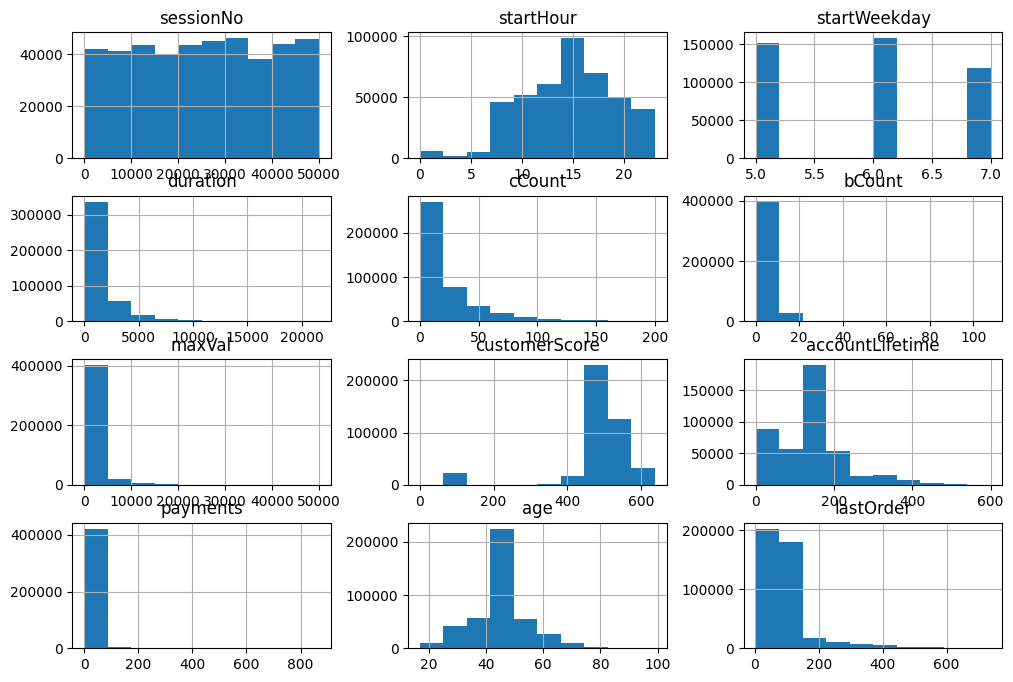

In [ ]:
# Summary statistics for numeric columns
print(df[numeric_cols].describe())

# Visualize the distributions of numeric columns
import matplotlib.pyplot as plt
df[numeric_cols].hist(figsize=(12, 8))
plt.show()

In [ ]:
# Explore the categorical columns
for col in categorical_cols:
    print(f"Column: {col}")

    # Print the top 10 most frequent values
    value_counts = df[col].value_counts()
    print("Most frequent values:")
    print(value_counts.head(10))

    # Check for any unexpected or invalid values
    unusual_values = value_counts[value_counts < 10].index
    if len(unusual_values) > 0:
        print("Unusual/Infrequent values:")
        print(unusual_values)
    print("---")

Column: cMinPrice
Most frequent values:
cMinPrice
9.99     55667
3.99     35395
19.99    23352
12.99    19007
14.99    18227
29.99    15337
4.99     15227
6.99     13211
7.99     12986
24.99    11050
Name: count, dtype: int64
Unusual/Infrequent values:
Index(['65.6', '34.96', '119.9', '46.99', '19.96', '569.99', '98.0', '110.0',
       '48.74', '18.5',
       ...
       '37.49', '31.95', '888.0', '23.5', '51.99', '159.9', '1190.0', '519.0',
       '30.95', '54.9'],
      dtype='object', name='cMinPrice', length=263)
---
Column: cMaxPrice
Most frequent values:
cMaxPrice
29.99    33194
19.99    27636
49.99    26032
39.99    24772
24.99    17868
59.99    16131
99.99    12498
79.99    11288
59.95    10973
34.99    10499
Name: count, dtype: int64
Unusual/Infrequent values:
Index(['28.9', '28.5', '247.12', '165.99', '42.5', '185.0', '57.85', '859.99',
       '449.0', '675.0',
       ...
       '34.96', '18.16', '11.0', '1190.0', '35.96', '23.5', '95.99', '4.75',
       '15.3', '201.99'],
   

In [ ]:
# Cross-validate columns
print(df.loc[df['cCount'] > df['bCount']])

        sessionNo  startHour  startWeekday  duration  cCount cMinPrice  \
8             3.0        6.0           5.0   181.477     9.0     29.99   
9             3.0        6.0           5.0   297.018    11.0      9.99   
10            3.0        6.0           5.0   310.967    11.0      9.99   
11            3.0        6.0           5.0   324.278    11.0      9.99   
12            3.0        6.0           5.0   341.613    11.0      9.99   
...           ...        ...           ...       ...     ...       ...   
429006    49998.0       18.0           7.0  2961.909     6.0     59.99   
429007    49998.0       18.0           7.0  4700.383    50.0      9.99   
429008    49998.0       18.0           7.0  5988.882    77.0      9.99   
429009    49999.0       18.0           7.0   675.114     6.0      59.0   
429010    49999.0       18.0           7.0   715.341     7.0      59.0   

       cMaxPrice cSumPrice  bCount bMinPrice  ...          availability  \
8          29.99     89.97     1.0  

In [ ]:
# Identify outliers using z-score
from scipy.stats import zscore

z = np.abs(zscore(df[numeric_cols]))

# Create a boolean mask for outlier rows, considering any outlier across columns
outlier_mask = (z > 3).any(axis=1)

# Filter the DataFrame using the outlier mask
outliers = df[outlier_mask]

print(outliers)

        sessionNo  startHour  startWeekday  duration  cCount cMinPrice  \
0             1.0        6.0           5.0     0.000     1.0     59.99   
1             1.0        6.0           5.0    11.940     1.0     59.99   
2             1.0        6.0           5.0    39.887     1.0     59.99   
70           12.0        6.0           5.0     9.220     2.0      9.99   
71           12.0        6.0           5.0    91.283     4.0      5.99   
...           ...        ...           ...       ...     ...       ...   
428999    49996.0       18.0           7.0  7015.682   197.0      6.99   
429000    49996.0       18.0           7.0  7074.729   197.0      6.99   
429001    49996.0       18.0           7.0  7089.360   197.0      6.99   
429002    49996.0       18.0           7.0  7170.905   197.0      6.99   
429003    49996.0       18.0           7.0  7271.812   197.0      6.99   

       cMaxPrice cSumPrice  bCount bMinPrice  ...          availability  \
0          59.99     59.99     1.0  

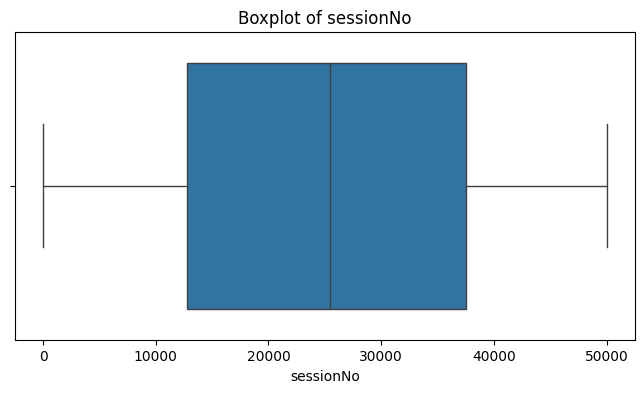

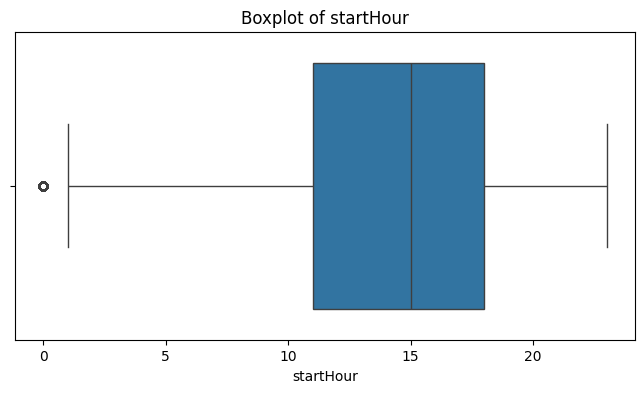

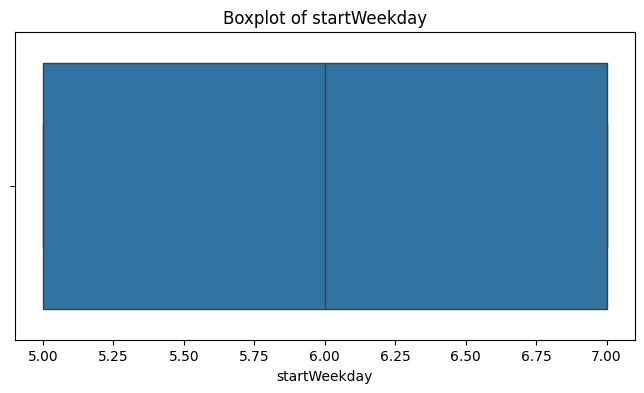

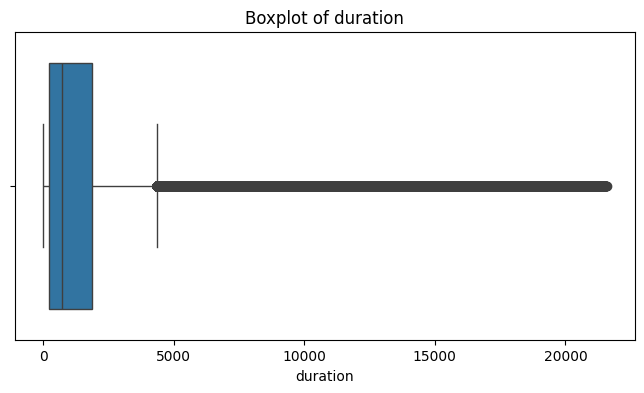

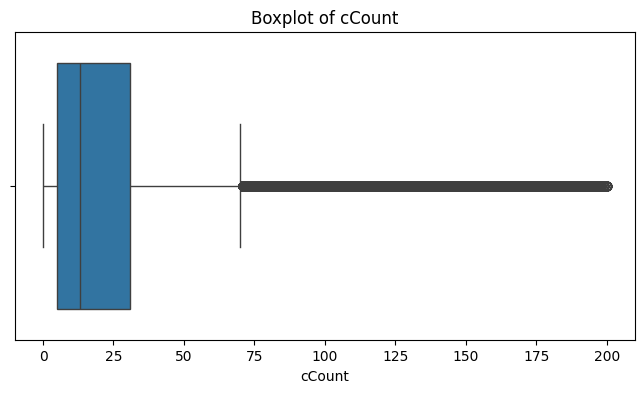

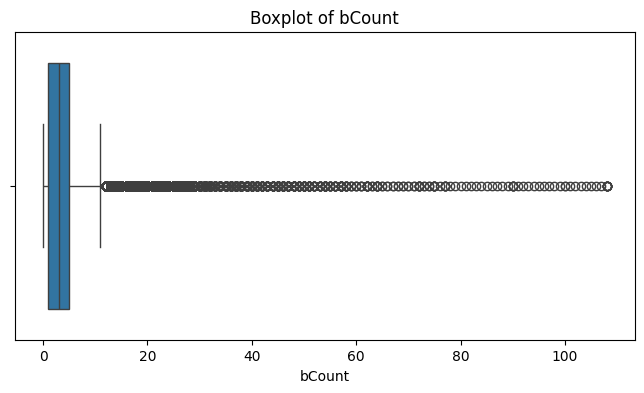

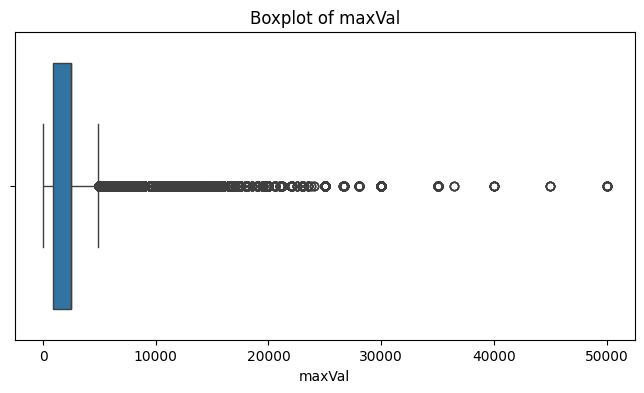

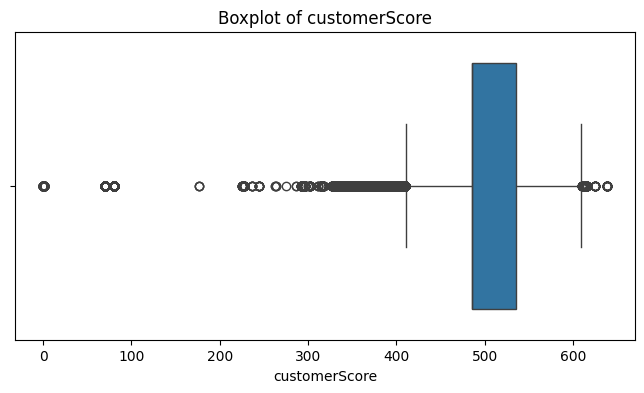

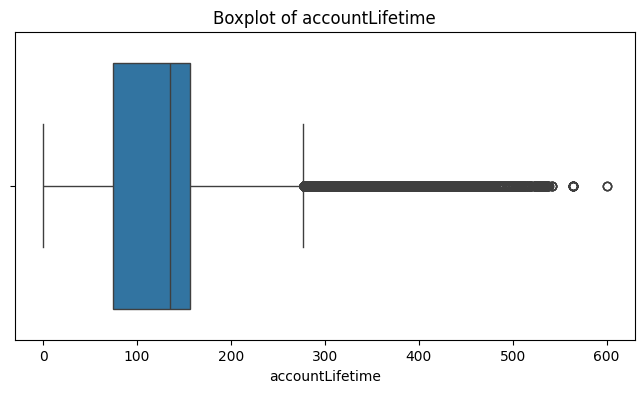

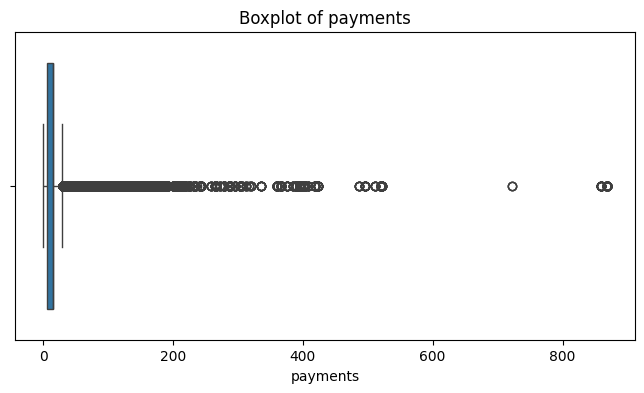

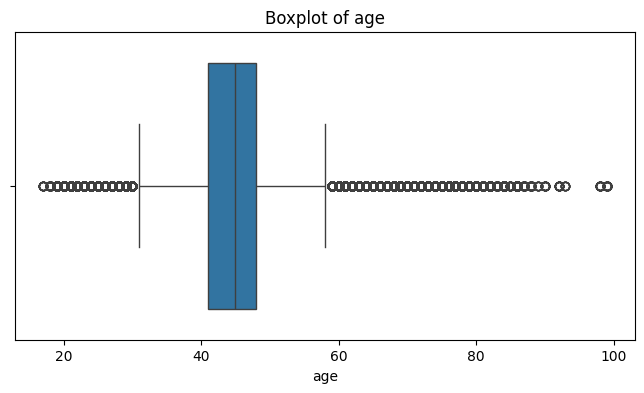

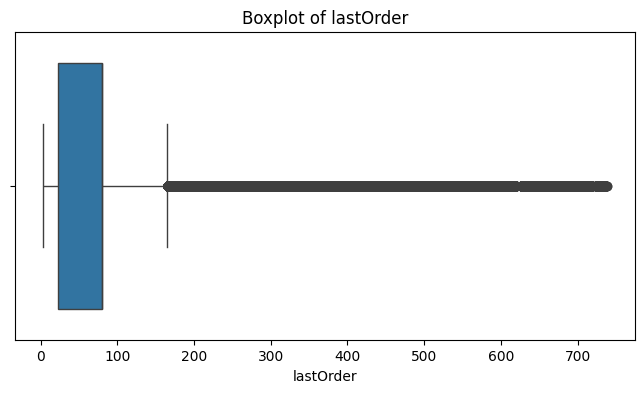

In [ ]:
# Boxplots for each numeric column to spot outliers
for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()


In [ ]:
#Convert all to lowercase
df[categorical_cols] = df[categorical_cols].apply(lambda x: x.str.lower())

In [ ]:
# Check logical consistency between min and max price columns
inconsistent_prices = df[df['cMinPrice'] > df['cMaxPrice']]
print("Rows with inconsistent price values:\n", inconsistent_prices)

Rows with inconsistent price values:
         sessionNo  startHour  startWeekday  duration  cCount cMinPrice  \
9             3.0        6.0           5.0   297.018    11.0      9.99   
10            3.0        6.0           5.0   310.967    11.0      9.99   
11            3.0        6.0           5.0   324.278    11.0      9.99   
12            3.0        6.0           5.0   341.613    11.0      9.99   
24            6.0        6.0           5.0     0.000     2.0     99.99   
...           ...        ...           ...       ...     ...       ...   
429002    49996.0       18.0           7.0  7170.905   197.0      6.99   
429003    49996.0       18.0           7.0  7271.812   197.0      6.99   
429007    49998.0       18.0           7.0  4700.383    50.0      9.99   
429008    49998.0       18.0           7.0  5988.882    77.0      9.99   
429009    49999.0       18.0           7.0   675.114     6.0      59.0   

       cMaxPrice cSumPrice  bCount bMinPrice  ...          availability  

In [ ]:
# Correct inconsistent price values
df.loc[df['cMinPrice'] > df['cMaxPrice'], ['cMinPrice', 'cMaxPrice']] = df.loc[df['cMinPrice'] > df['cMaxPrice'], ['cMaxPrice', 'cMinPrice']].values

In [ ]:
# Display summary statistics for all columns in the DataFrame, including both numeric and categorical columns
print(df.describe(include='all'))

            sessionNo      startHour   startWeekday       duration  \
count   429013.000000  429013.000000  429013.000000  429013.000000   
unique            NaN            NaN            NaN            NaN   
top               NaN            NaN            NaN            NaN   
freq              NaN            NaN            NaN            NaN   
mean     25274.631293      14.617061       5.924839    1573.901640   
std      14441.366146       4.485914       0.790930    2427.123356   
min          1.000000       0.000000       5.000000       0.000000   
25%      12731.000000      11.000000       5.000000     225.070000   
50%      25470.000000      15.000000       6.000000     738.199000   
75%      37542.000000      18.000000       7.000000    1880.265000   
max      50000.000000      23.000000       7.000000   21580.092000   

               cCount cMinPrice cMaxPrice cSumPrice         bCount bMinPrice  \
count   429013.000000    429013    429013    429013  429013.000000    429013   

##Model Klasifikasi

In [ ]:
import pandas as pd #Make sure pandas is imported
from sklearn.model_selection import train_test_split #Import train_test_split to split the data
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Assuming 'df' is your DataFrame containing all the data

X = df.drop(columns=['order'])
y = df['order']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize LabelEncoder
encoder = LabelEncoder()

# Iterate through columns of X_train and encode object (string) types
for col in X_train.select_dtypes(include=['object']).columns:
    # Fit on the combined unique values from both training and testing data
    all_values = pd.concat([X_train[col], X_test[col]]).unique()
    encoder.fit(all_values)

    X_train[col] = encoder.transform(X_train[col])
    X_test[col] = encoder.transform(X_test[col]) # Apply the same encoding to X_test

# Create and train the RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test data  #This line is added to get predictions from the model
y_pred_rf = rf_model.predict(X_test)

# Calculate accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Accuracy (Random Forest):", accuracy_rf)

# show classification reports and confusion matrix
print("Classification Report (Random Forest):\n", classification_report(y_test, y_pred_rf))
print("Confusion Matrix (Random Forest):\n", confusion_matrix(y_test, y_pred_rf))

Accuracy (Random Forest): 0.9122524853443352
Classification Report (Random Forest):
               precision    recall  f1-score   support

           n       0.89      0.83      0.86     27700
           y       0.92      0.95      0.94     58103

    accuracy                           0.91     85803
   macro avg       0.91      0.89      0.90     85803
weighted avg       0.91      0.91      0.91     85803

Confusion Matrix (Random Forest):
 [[22983  4717]
 [ 2812 55291]]


## Analisis Model Klasifikasi

1. Akurasi:

  - Akurasi model adalah 0.9122, yang berarti model memprediksi kelas dengan benar sekitar 91.22% dari waktu.
  - Ini merupakan nilai akurasi yang cukup tinggi, menunjukkan bahwa model secara umum berkinerja baik.
2. Classification Report:

  - Precision:
    - Precision untuk kelas "n" adalah 0.89, yang berarti dari semua data yang diprediksi sebagai "n", sekitar 89% benar-benar "n".
    - Precision untuk kelas "y" adalah 0.92, yang berarti dari semua data yang diprediksi sebagai "y", sekitar 92% benar-benar "y".
  - Recall:
    - Recall untuk kelas "n" adalah 0.83, yang berarti model berhasil mengidentifikasi sekitar 83% dari semua data "n" yang sebenarnya.
    - Recall untuk kelas "y" adalah 0.95, yang berarti model berhasil mengidentifikasi sekitar 95% dari semua data "y" yang sebenarnya.

  - F1-score:
    - F1-score adalah rata-rata harmonik antara precision dan recall.
    - F1-score untuk kelas "n" adalah 0.86, dan untuk kelas "y" adalah 0.94.
    - Nilai F1-score yang tinggi menunjukkan keseimbangan yang baik antara precision dan recall.

  - Support:
    - Support menunjukkan jumlah data aktual untuk setiap kelas.
    - Ada 27700 data untuk kelas "n" dan 58103 data untuk kelas "y".

3. Confusion Matrix:
  - Confusion matrix memberikan gambaran lebih detail tentang kinerja model:
    - True Positive (TP): 55291 (model memprediksi "y" dengan benar)
    - True Negative (TN): 22983 (model memprediksi "n" dengan benar)
    - False Positive (FP): 4717 (model memprediksi "y" secara salah)
    - False Negative (FN): 2812 (model memprediksi "n" secara salah)

## Visualisasi Confusion Matrix

- Predicted No, Actual No (True Negative - TN): 22,983.
Model memprediksi "No" dengan benar untuk 22,983 sampel.

- Predicted Yes, Actual No (False Positive - FP): 4,717.
Model salah memprediksi "Yes" padahal seharusnya "No".

- Predicted No, Actual Yes (False Negative - FN): 2,812.
Model salah memprediksi "No" padahal seharusnya "Yes".

- Predicted Yes, Actual Yes (True Positive - TP): 55,291.
Model memprediksi "Yes" dengan benar untuk 55,291 sampel.





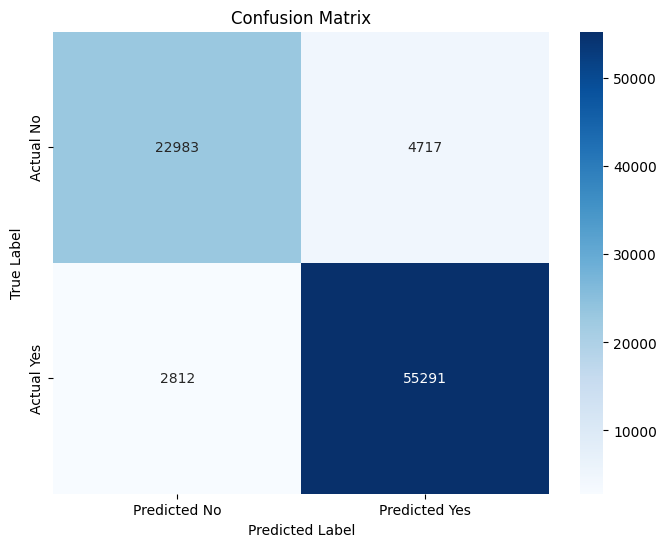

In [ ]:
cm = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted No', 'Predicted Yes'],
            yticklabels=['Actual No', 'Actual Yes'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

## Visualisasi ROC Curve

- Dengan AUC sebesar 0.97, model memiliki kemampuan diskriminasi yang sangat baik untuk membedakan antara kelas positif dan negatif.
- Pada berbagai threshold, model mampu mempertahankan keseimbangan yang baik antara TPR (benar memprediksi positif) dan FPR (meminimalkan prediksi positif palsu).

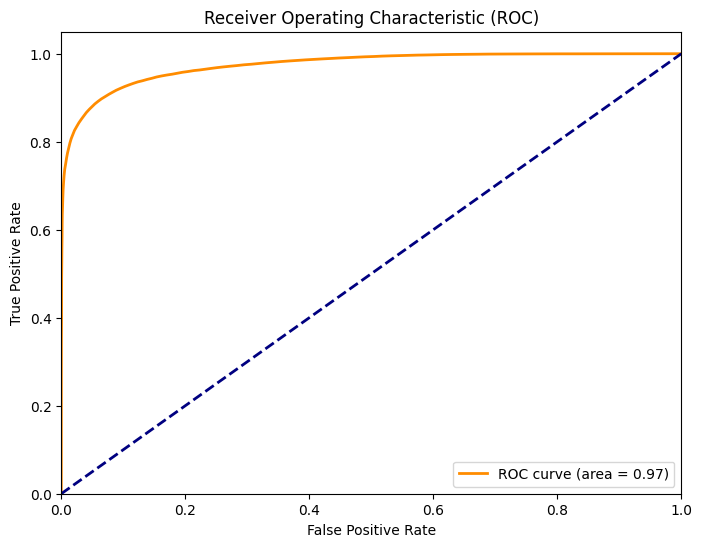

In [ ]:
from sklearn.metrics import roc_curve, auc

# Assuming you have probabilities for the positive class (e.g., from predict_proba)
y_probs = rf_model.predict_proba(X_test)[:, 1]

# Convert 'y_test' to numerical format where 'y' is 1 and 'n' is 0
y_test_numeric = [1 if value == 'y' else 0 for value in y_test]

# Use the numerical y_test in roc_curve
fpr, tpr, thresholds = roc_curve(y_test_numeric, y_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

## Visualisasi Feature Importance

- sessionNo, duration, dan cSumPrice memiliki nilai feature importance tertinggi. Hal ini menunjukkan bahwa fitur-fitur tersebut memiliki pengaruh paling besar dalam menentukan output model.

- availability, startWeekday, dan onlineStatus memiliki kontribusi yang sangat kecil terhadap prediksi model. Fitur ini mungkin tidak terlalu relevan atau penting bagi model.

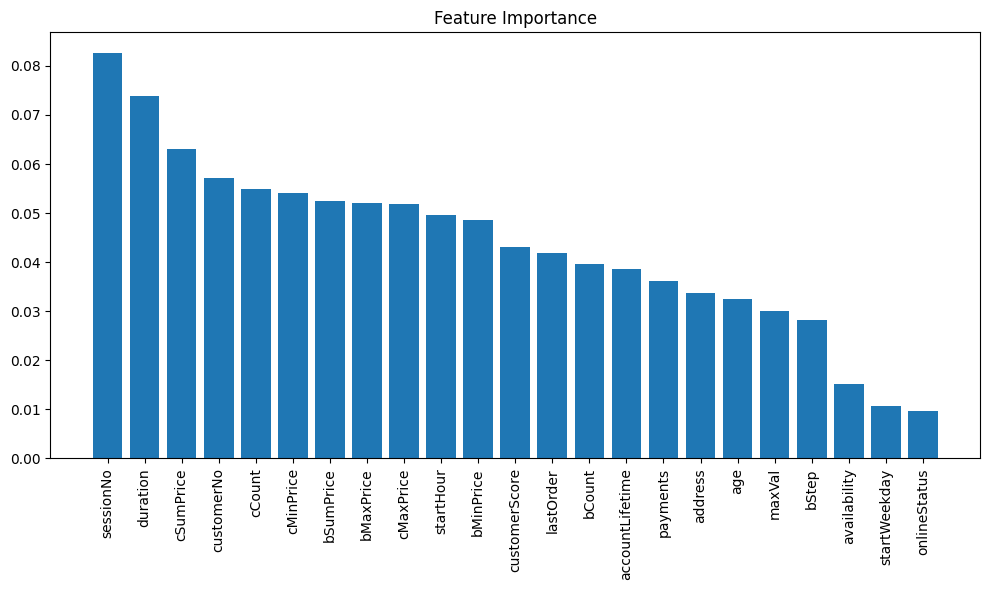

In [ ]:
importances = rf_model.feature_importances_
feature_names = X_train.columns

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Feature Importance")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), feature_names[indices], rotation=90)
plt.tight_layout()
plt.show()

## Kesimpulan

1. **Akurasi Model**: Model ini memiliki akurasi **91.22%**, yang menunjukkan bahwa model memprediksi kelas dengan benar sekitar 91.22% dari waktu.

2. **Classification Report**:
   - **Precision**: Untuk kelas "n" (Tidak Order), precision mencapai **0.89**, dan untuk kelas "y" (Order), precision mencapai **0.92**.
   - **Recall**: Untuk kelas "n", recall adalah **0.83**, sedangkan untuk kelas "y", recall mencapai **0.95**.
   - **F1-score**: Nilai F1-score untuk kelas "n" adalah **0.86**, sementara untuk kelas "y" adalah **0.94**.
   - **Support**: Jumlah data untuk kelas "n" adalah **27,700**, sementara kelas "y" memiliki **58,103** data.

3. **Confusion Matrix**:
   - Model menghasilkan **True Positive (TP)** sebanyak **55,291** untuk kelas "y".
   - Model menghasilkan **True Negative (TN)** sebanyak **22,983** untuk kelas "n".
   - Terdapat **4,717 False Positive (FP)**, di mana model salah memprediksi kelas "y" padahal seharusnya "n".
   - Terdapat **2,812 False Negative (FN)**, di mana model salah memprediksi kelas "n" padahal seharusnya "y".

4. **Visualisasi ROC Curve**: AUC (Area Under the Curve) model adalah **0.97**, menunjukkan bahwa model memiliki kemampuan diskriminasi yang sangat baik dalam membedakan antara kelas positif dan negatif.

5. **Visualisasi Feature Importance**: Fitur yang memiliki kontribusi tertinggi dalam model adalah **sessionNo**, **duration**, dan **cSumPrice**, sementara fitur dengan kontribusi lebih kecil adalah **availability**, **startWeekday**, dan **onlineStatus**.

Secara keseluruhan, model ini menunjukkan performa yang sangat baik, dengan akurasi tinggi, precision dan recall yang seimbang, serta kemampuan yang kuat dalam membedakan antara kelas positif dan negatif.